In [57]:
import pandas as pd
import numpy as np # Import numpy for nanmean

excel = pd.ExcelFile("kelp.xlsx")

# List of columns to keep
columns_to_keep = [
    'Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
    'Survey Year', 'Acres', 'Temp', 'Temp 1 Shore Edge', 'Temp 1 Water Edge',
    'Temp 2 Shore Edge', 'Temp 2 Water Edge', 'Ave Shore Edge', 'Ave Temp Water Edge'
]

# List of temperature columns to average
temp_columns_to_average = [
    'Temp', 'Temp 1 Shore Edge', 'Temp 1 Water Edge', 'Temp 2 Shore Edge',
    'Temp 2 Water Edge', 'Ave Shore Edge', 'Ave Temp Water Edge'
]

# List of years to calculate average temperature for
years_to_average = ['2020','2021', '2022', '2023', '2024']

for sheet in excel.sheet_names:
    # Skip the 'Notes' sheet
    if sheet == 'Notes':
        print(f"Skipping sheet: {sheet}")
        continue

    print(f"Processing sheet: {sheet}") # Optional: To see which sheet is being processed
    df = pd.read_excel("kelp.xlsx", sheet_name=sheet)

    # Check which columns exist in the current sheet
    existing_columns = [col for col in columns_to_keep if col in df.columns]

    # If no desired columns exist, print a message and skip processing this sheet further
    if not existing_columns:
        print(f"Sheet '{sheet}' does not contain any of the desired columns. Skipping this sheet.")
        display(df.head()) # Display the head for context
        continue # Skip to the next sheet

    # Select only the existing columns
    df = df[existing_columns]

    # Calculate average temperature for specified years if temp columns exist
    if sheet in years_to_average:
        # Identify existing temperature columns to average in the current sheet
        existing_temp_columns = [col for col in temp_columns_to_average if col in df.columns]

        if existing_temp_columns:
            # Calculate the mean, ignoring NaN values
            df['Temp'] = df[existing_temp_columns].mean(axis=1, skipna=True)
            print(f"Calculated 'Average Temp' for sheet: {sheet}")
        else:
            print(f"No temperature columns found for averaging in sheet: {sheet}")
            df['Temp'] = np.nan # Add column with NaN if no temp columns exist


    # Drop rows where 'Acres' column is NaN, but only if the column exists and was selected
    if 'Acres' in df.columns:
        df = df.dropna(subset=['Acres'])
        print(f"Dropped rows with NaN in 'Acres' for sheet: {sheet}")
        display(df.head()) # Add this line to display the head of each DataFrame
    else:
        print(f"Sheet '{sheet}' does not have an 'Acres' column after selection. Skipping dropping NaN values for this sheet.")
        display(df.head()) # Display the head even if 'Acres' column is missing or not selected


    df.to_excel(f"{sheet}.xlsx", index=False)

Processing sheet: 2015
Dropped rows with NaN in 'Acres' for sheet: 2015


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Ebey's Landing,EBL,2015-06-14,14,6,2015,9.490754,11.0,NaN
1,Ebey's Landing,EBL,2015-07-19,19,7,2015,14.626063,13.0,NaN
2,Ebey's Landing,EBL,2015-08-15,15,8,2015,18.354044,13.0,NaN
3,Ebey's Landing,EBL,2015-09-26,26,9,2015,17.885642,12.0,NaN
4,Hastie Lake,HSTL,2015-06-15,15,6,2015,13.287837,NaN,NaN


Processing sheet: 2016
Dropped rows with NaN in 'Acres' for sheet: 2016


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Freshwater Bay 1,FWB,2016-07-30,30,7,2016,145.089653,12.0,NaN
1,Freshwater Bay 1,FWB,2016-08-19,19,8,2016,169.696118,14.0,NaN
2,Freshwater Bay 2,FWBO,2016-07-02,2,7,2016,0.706491,13.0,NaN
3,Ben Ure,BEUR,2016-07-01,1,7,2016,0.784476,12.0,NaN
4,Ben Ure,BEUR,2016-07-30,30,7,2016,0.820192,12.0,NaN


Processing sheet: 2017
Dropped rows with NaN in 'Acres' for sheet: 2017


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2017-07-09,9,7,2017,23.094739,13.0,NaN
1,Clallam Bay,CLLB,2017-07-23,23,7,2017,25.128053,12.0,NaN
2,Freshwater Bay 1,FWB,2017-08-20,20,8,2017,168.871267,NaN,NaN
3,Freshwater Bay 2,FWBO,2017-09-17,17,9,2017,0.929402,10.0,NaN
4,Ben Ure,BEUR,2017-05-25,25,5,2017,0.475675,9.0,NaN


Processing sheet: 2018
Dropped rows with NaN in 'Acres' for sheet: 2018


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0,NaN
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0,NaN
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0,NaN
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0,NaN
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0,NaN


Processing sheet: 2019
Dropped rows with NaN in 'Acres' for sheet: 2019


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2019-07-19,19,7,2019,22.331618,14.4,NaN
1,Freshwater Bay 1,FWB,2019-07-20,20,7,2019,117.860533,14.0,NaN
2,Freshwater Bay 2,FWBO,2019-07-18,18,7,2019,0.969558,15.0,NaN
3,Ebey's Landing,EBL,2019-06-21,21,6,2019,24.952333,12.0,NaN
4,Ebey's Landing,EBL,2019-07-18,18,7,2019,37.181197,12.3,NaN


Processing sheet: 2020
Calculated 'Average Temp' for sheet: 2020
Dropped rows with NaN in 'Acres' for sheet: 2020


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2020-07-23,23,7,2020,13.136316,12.0,12.0
1,Freshwater Bay 1,FWB,2020-08-19,19,8,2020,112.665764,12.2,12.2
2,Freshwater Bay 2,FWBO,2020-08-19,19,8,2020,0.635944,NaN,NaN
3,Lowell,LWLP,2020-08-22,22,8,2020,5.854933,13.9,13.9
4,Lowell,LWLP,2020-08-22,22,8,2020,4.915611,13.9,13.9


Processing sheet: 2021
Calculated 'Average Temp' for sheet: 2021
Dropped rows with NaN in 'Acres' for sheet: 2021


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2021-08-23,23,8,2021,15.315023,12.22,12.22
1,Freshwater Bay 1,FWB,2021-07-27,27,7,2021,128.509924,NaN,NaN
2,Freshwater Bay 2,FWBO,2021-09-07,7,9,2021,0.932312,11.11,11.11
3,Ebey's Landing,EBL,2021-08-11,11,8,2021,37.681341,12.00,12.00
4,Hoypus Point,HOYP,2021-06-07,7,6,2021,1.551245,11.00,11.00


Processing sheet: 2022
Calculated 'Average Temp' for sheet: 2022
Dropped rows with NaN in 'Acres' for sheet: 2022


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2022-08-29,29,8,2022,12.728182,12.22,12.22
1,Freshwater Bay 1,FWB,2022-07-31,31,7,2022,41.872913,13.33,13.33
2,Freshwater Bay 2,FWBO,2022-07-31,31,7,2022,0.782634,15.00,15.00
3,Freshwater Bay 3,FWBO-N,2022-07-31,31,7,2022,0.914538,NaN,NaN
4,Ebey's Landing,EBL,2022-08-23,23,8,2022,38.629817,12.25,12.25


Processing sheet: 2023
Calculated 'Average Temp' for sheet: 2023
Dropped rows with NaN in 'Acres' for sheet: 2023


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2023-09-02,2,9,2023,9.584521,NaN,NaN
1,Freshwater Bay 1,FWB,2023-08-14,14,8,2023,121.974427,11.4,11.4
2,Freshwater Bay 2,FWBO,2023-08-31,31,8,2023,0.586538,11.1,11.1
3,Freshwater Bay 3,FWBO-N,2023-08-31,31,8,2023,0.315308,11.1,11.1
4,Ebey's Landing,EBL,2023-08-14,14,8,2023,31.122627,12.2,12.2


Processing sheet: 2024
Calculated 'Average Temp' for sheet: 2024
Dropped rows with NaN in 'Acres' for sheet: 2024


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Skipping sheet: Notes


In [59]:
for sheet in excel.sheet_names:
    # Select only the existing columns
    df = df[existing_columns]

    # Drop rows where 'Acres' column is NaN, but only if the column exists and was selected
    if 'Temp' in df.columns:
        df = df.dropna(subset=['Temp'])
        print(f"Dropped rows with NAN in 'Temp' for sheet: {sheet}")
        display(df.head()) # Add this line to display the head of each DataFrame

Dropped rows with NAN in 'Temp' for sheet: 2015


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2016


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2017


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2018


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2019


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2020


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2021


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2022


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2023


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: 2024


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


Dropped rows with NAN in 'Temp' for sheet: Notes


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.343985,14.7,14.7
1,Aiston Preserve,AISP,2024-07-21,21,7,2024,0.421390,14.7,14.7
2,Biz Point,BZPT,2024-07-09,9,7,2024,0.603576,11.1,11.1
3,Biz Point,BZPT,2024-08-06,6,8,2024,0.722723,11.0,11.0
4,Biz Point,BZPT,2024-09-16,16,9,2024,1.039652,11.1,11.1


In [64]:
df.columns

Index(['Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
       'Survey Year', 'Acres', 'Temp', 'Ave Temp Water Edge'],
      dtype='object')

In [65]:
df.drop(columns=['Ave Temp Water Edge'])

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp
0,Clallam Bay,CLLB,2018-07-16,16,7,2018,18.767499,14.0
1,Freshwater Bay 1,FWB,2018-07-26,26,7,2018,78.006223,12.0
2,Freshwater Bay 2,FWBO,2018-08-10,10,8,2018,1.436845,13.0
3,Freshwater Bay 3,FWBO-N,2018-08-10,10,8,2018,2.489065,13.0
4,Ben Ure,BEUR,2018-06-18,18,6,2018,0.565004,12.0
5,Ben Ure,BEUR,2018-07-12,12,7,2018,1.187593,12.0
6,Ben Ure,BEUR,2018-07-13,13,7,2018,1.216470,12.0
7,Ben Ure,BEUR,2018-08-24,24,8,2018,0.998649,12.0
8,Ebey's Landing,EBL,2018-05-28,28,5,2018,0.301316,10.0
9,Ebey's Landing,EBL,2018-07-02,2,7,2018,18.513422,12.0


In [66]:
df.columns

Index(['Bed Name', 'Site Code', 'Survey Date', 'Survey Day', 'Survey Month',
       'Survey Year', 'Acres', 'Temp', 'Ave Temp Water Edge'],
      dtype='object')

In [68]:
import pandas as pd
import os

# Get a list of all processed Excel files (excluding the original and notes)
processed_files = [f for f in os.listdir('.') if f.endswith('.xlsx') and f not in ['kelp.xlsx', 'Notes.xlsx']]

# Create an empty list to store DataFrames
df_list = []

# Read each processed Excel file and append its DataFrame to the list
for file in processed_files:
    try:
        df = pd.read_excel(file)
        df_list.append(df)
        print(f"Successfully read {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames in the list
if df_list:
    merged_df = pd.concat(df_list, ignore_index=True)
    print("\nMerged DataFrame created:")
    display(merged_df.head())
    print("\nInfo of the merged DataFrame:")
    merged_df.info()

    # Drop the 'Ave Temp Water Edge' column after merging
    if 'Ave Temp Water Edge' in merged_df.columns:
        merged_df = merged_df.drop(columns=['Ave Temp Water Edge'])
        print("\n'Ave Temp Water Edge' column dropped from merged DataFrame.")
    else:
        print("\n'Ave Temp Water Edge' column not found in merged DataFrame.")


    # Sort the merged DataFrame by 'Survey Year'
    merged_df = merged_df.sort_values(by='Survey Year').reset_index(drop=True)
    print("\nMerged DataFrame sorted by year:")
    display(merged_df.head())

else:
    print("No processed Excel files found to merge.")

Successfully read 2020.xlsx
Successfully read 2019.xlsx
Successfully read 2016.xlsx
Successfully read 2021.xlsx
Successfully read 2022.xlsx
Successfully read 2015.xlsx
Successfully read 2017.xlsx
Successfully read 2023.xlsx
Successfully read 2024.xlsx
Successfully read 2018.xlsx

Merged DataFrame created:


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp,Ave Temp Water Edge
0,Clallam Bay,CLLB,2020-07-23,23,7,2020,13.136316,12.0,12.0
1,Freshwater Bay 1,FWB,2020-08-19,19,8,2020,112.665764,12.2,12.2
2,Freshwater Bay 2,FWBO,2020-08-19,19,8,2020,0.635944,NaN,NaN
3,Lowell,LWLP,2020-08-22,22,8,2020,5.854933,13.9,13.9
4,Lowell,LWLP,2020-08-22,22,8,2020,4.915611,13.9,13.9



Info of the merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Bed Name             539 non-null    object        
 1   Site Code            539 non-null    object        
 2   Survey Date          539 non-null    datetime64[ns]
 3   Survey Day           539 non-null    int64         
 4   Survey Month         539 non-null    int64         
 5   Survey Year          539 non-null    int64         
 6   Acres                539 non-null    float64       
 7   Temp                 463 non-null    float64       
 8   Ave Temp Water Edge  208 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 38.0+ KB

'Ave Temp Water Edge' column dropped from merged DataFrame.

Merged DataFrame sorted by year:


,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp
0,Mukilteo I,MKTO,2015-07-16,16,7,2015,0.278781,16.0
1,Mukilteo F,MKTO,2015-07-16,16,7,2015,0.575191,16.0
2,Mukilteo G,MKTO,2015-07-16,16,7,2015,0.772821,16.0
3,Mukilteo H,MKTO,2015-07-16,16,7,2015,0.062958,16.0
4,Meadowdale 1,MDL,2015-07-17,17,7,2015,0.647495,NaN


In [72]:
# Drop NAN values for temp after merging
if 'Temp' in merged_df.columns:
    merged_df = merged_df.dropna(subset=['Temp'])

In [74]:
merged_df.tail()

,Bed Name,Site Code,Survey Date,Survey Day,Survey Month,Survey Year,Acres,Temp
534,Edmonds 1,ED-DP,2024-07-18,18,7,2024,0.162917,15.0
535,Ebey's Landing,EBL,2024-08-20,20,8,2024,33.207906,11.3
536,Possession Point,POSS,2024-06-18,18,6,2024,23.552763,13.6
537,Polnell Point,POLN,2024-08-21,21,8,2024,35.730997,14.4
538,North Beach East,NB-E,2024-08-17,17,8,2024,19.296391,10.9


In [75]:
# Save the merged DataFrame to a CSV file
output_csv_path = "merged_kelp_data.csv" # You can change the filename if you like
merged_df.to_csv(output_csv_path, index=False)

print(f"Merged DataFrame saved to '{output_csv_path}'")

Merged DataFrame saved to 'merged_kelp_data.csv'


In [76]:
merged_df = pd.read_csv("merged_kelp_data.csv")

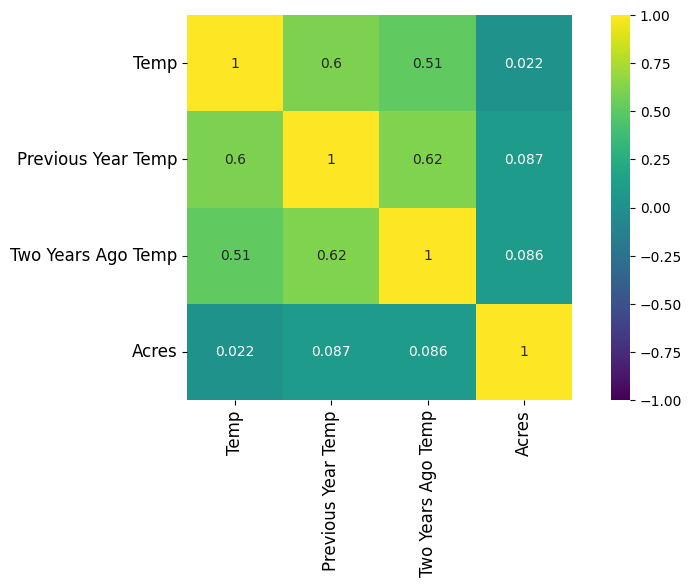

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Ensure 'Survey Date' is in datetime format for sorting
merged_df['Survey Date'] = pd.to_datetime(merged_df['Survey Date'])

# Sort by Bed Name/Site Code and Survey Date to ensure correct lagging
merged_df = merged_df.sort_values(by=['Bed Name', 'Site Code', 'Survey Date'])

# Calculate Previous Year Temp by grouping and shifting
# Assuming 'Survey Year' is sufficient for lagging by a year
# If there are multiple surveys within a year for the same site, this might need adjustment
merged_df['Previous Year Temp'] = merged_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(1)

merged_df['Two Years Ago Temp'] = merged_df.groupby(['Bed Name', 'Site Code'])['Temp'].shift(2)

predictor_variables = ['Temp', 'Survey Date', 'Previous Year Temp', 'Two Years Ago Temp']

# Filter for numerical predictors that actually exist in the DataFrame
numerical_predictors = merged_df[predictor_variables].select_dtypes(include='number').columns.to_list()

# Add the 'Previous Year Temp' column to the list if it exists
if 'Previous Year Temp' in merged_df.columns:
    numerical_predictors.append('Previous Year Temp')
    # Remove duplicates if any
    numerical_predictors = list(dict.fromkeys(numerical_predictors))


corr_matrix = merged_df[numerical_predictors + ["Acres"]].corr()

plt.figure(figsize=(10, 5))

sns.heatmap(
    corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap="viridis"
)

plt.tick_params(labelsize=12)

plt.show()